In [155]:
import pandas as pd
from sklearn.datasets import load_iris
# visualisasi
import matplotlib.pyplot as plt

import squarify

import seaborn as sns

In [156]:
# Load dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

In [157]:
# Buat DataFrame
df = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = y

In [158]:
df.head()

,feature_0,feature_1,feature_2,feature_3,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [159]:
# rename dataframe column
df = df.rename(columns={'feature_0':'Sepal Length','feature_1':'Sepal Width','feature_2':'Petal Length','feature_3':'Petal Width'})


In [160]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [161]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
target          0
dtype: int64

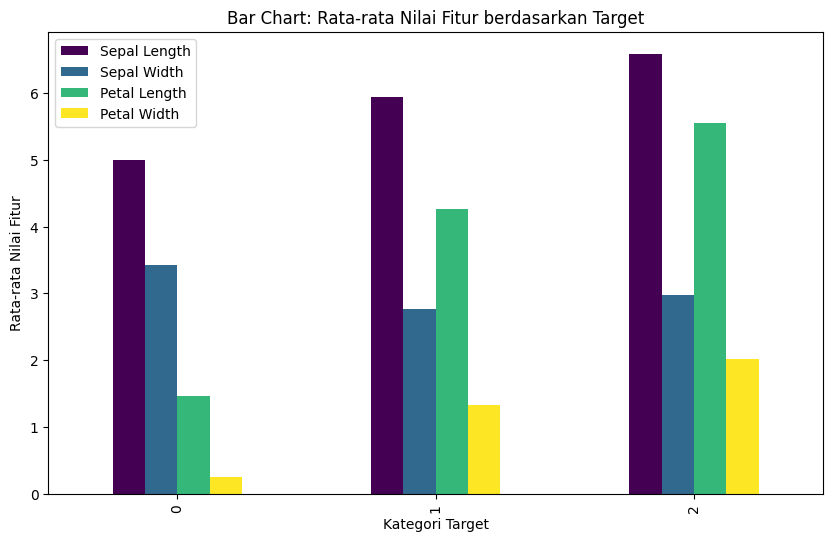

In [162]:
# Bar Chart untuk nilai rata-rata setiap fitur berdasarkan target
mean_values = df.groupby('target').mean()
bar_chart = mean_values.plot(kind='bar', figsize=(10, 6), colormap='viridis')
bar_chart.set_ylabel('Rata-rata Nilai Fitur')
bar_chart.set_xlabel('Kategori Target')
bar_chart.set_title('Bar Chart: Rata-rata Nilai Fitur berdasarkan Target')
plt.show()

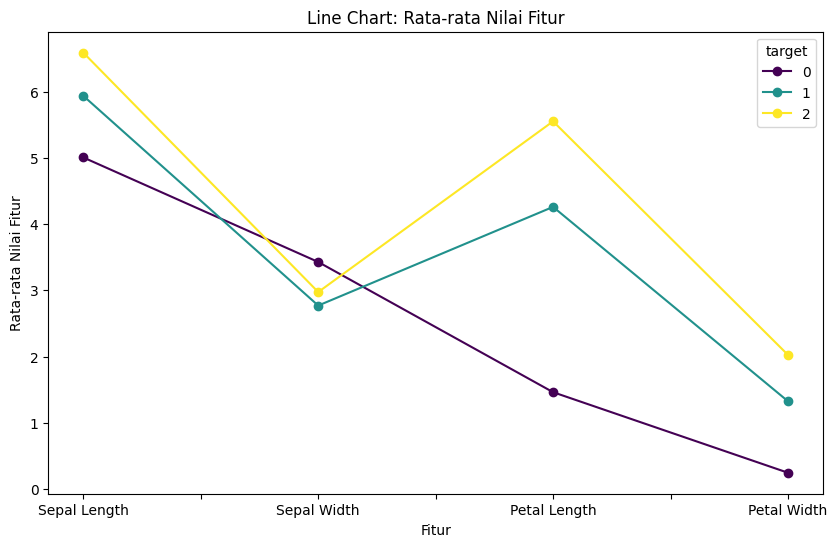

In [163]:
# Line Chart untuk nilai rata-rata setiap fitur
line_chart = mean_values.T.plot(kind='line', marker='o', figsize=(10, 6), colormap='viridis')
line_chart.set_ylabel('Rata-rata Nilai Fitur')
line_chart.set_xlabel('Fitur')
line_chart.set_title('Line Chart: Rata-rata Nilai Fitur')
plt.show()

Text(0.5, 0.98, 'Combo Chart: Kombinasi Bar dan Line Chart')

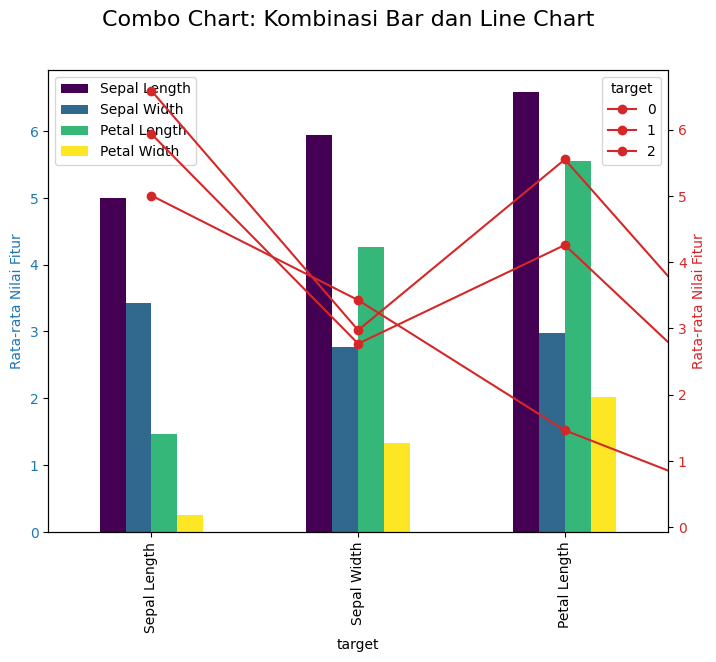

In [185]:
# Combo Chart: Kombinasi Bar dan Line Chart
# Bar Chart pada sumbu kiri
fig, ax1 = plt.subplots(figsize=(8, 6))
color = 'tab:blue'
ax1.set_xlabel('Kategori Target')
ax1.set_ylabel('Rata-rata Nilai Fitur', color=color)
bar_chart_combo = mean_values.plot(kind='bar', ax=ax1, colormap='viridis')
ax1.tick_params(axis='y', labelcolor=color)

# Line Chart pada sumbu kanan
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Rata-rata Nilai Fitur', color=color)
line_chart_combo = mean_values.T.plot(kind='line', marker='o', ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
# Judul dan tampilan grafik
fig.suptitle('Combo Chart: Kombinasi Bar dan Line Chart', fontsize=16)

# KOMPOSISI

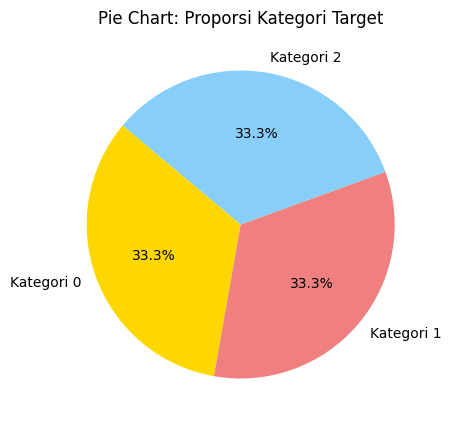

In [168]:
# Pie Chart untuk proporsi kategori target
target_counts = df['target'].value_counts()
labels = [f'Kategori {i}' for i in target_counts.index]
colors = ['gold', 'lightcoral', 'lightskyblue']

plt.figure(figsize=(5, 5))
plt.pie(target_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Proporsi Kategori Target')
plt.show()

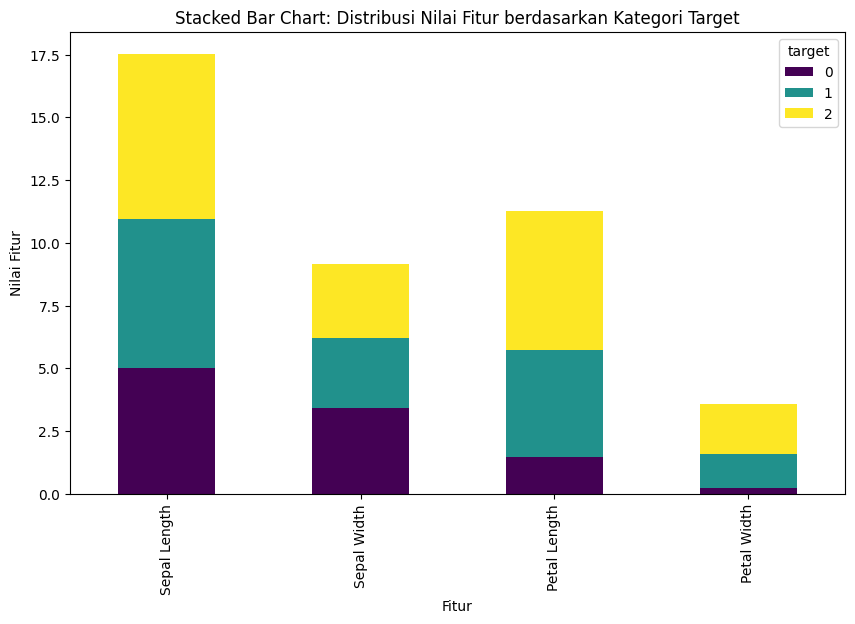

In [169]:
# Stacked Bar Chart untuk distribusi nilai fitur berdasarkan kategori target
stacked_bar_chart = df.groupby('target').mean().T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
stacked_bar_chart.set_ylabel('Nilai Fitur')
stacked_bar_chart.set_xlabel('Fitur')
stacked_bar_chart.set_title('Stacked Bar Chart: Distribusi Nilai Fitur berdasarkan Kategori Target')
plt.show()

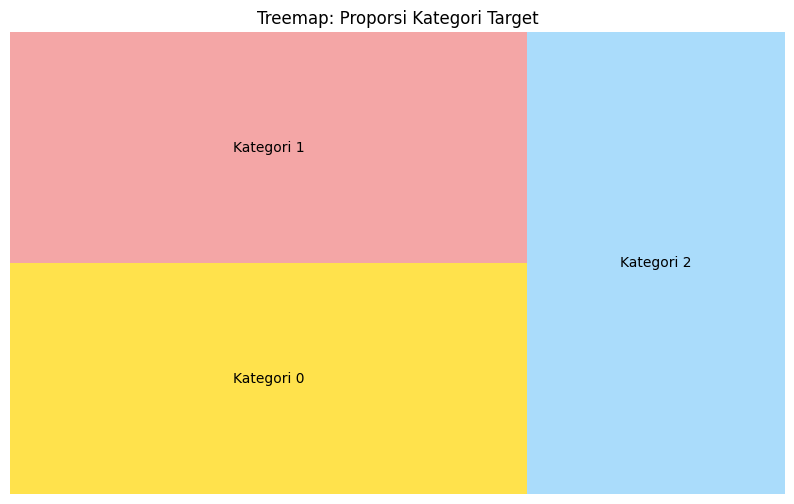

In [170]:
# Treemap untuk proporsi kategori target
plt.figure(figsize=(10, 6))
squarify.plot(sizes=target_counts, label=labels, color=colors, alpha=0.7)
plt.title('Treemap: Proporsi Kategori Target')
plt.axis('off')
plt.show()

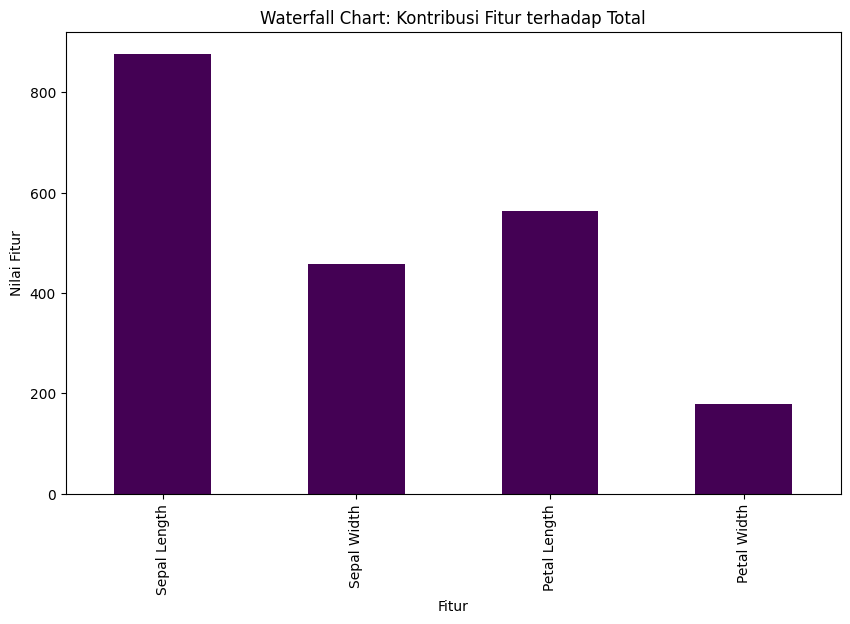

In [171]:
# Waterfall Chart untuk melihat kontribusi setiap fitur terhadap total
waterfall_data = df.drop('target', axis=1).sum()
waterfall_chart = waterfall_data.plot(kind='bar', figsize=(10, 6), colormap='viridis')
waterfall_chart.set_ylabel('Nilai Fitur')
waterfall_chart.set_xlabel('Fitur')
waterfall_chart.set_title('Waterfall Chart: Kontribusi Fitur terhadap Total')
plt.show()

# DISTRIBUSI

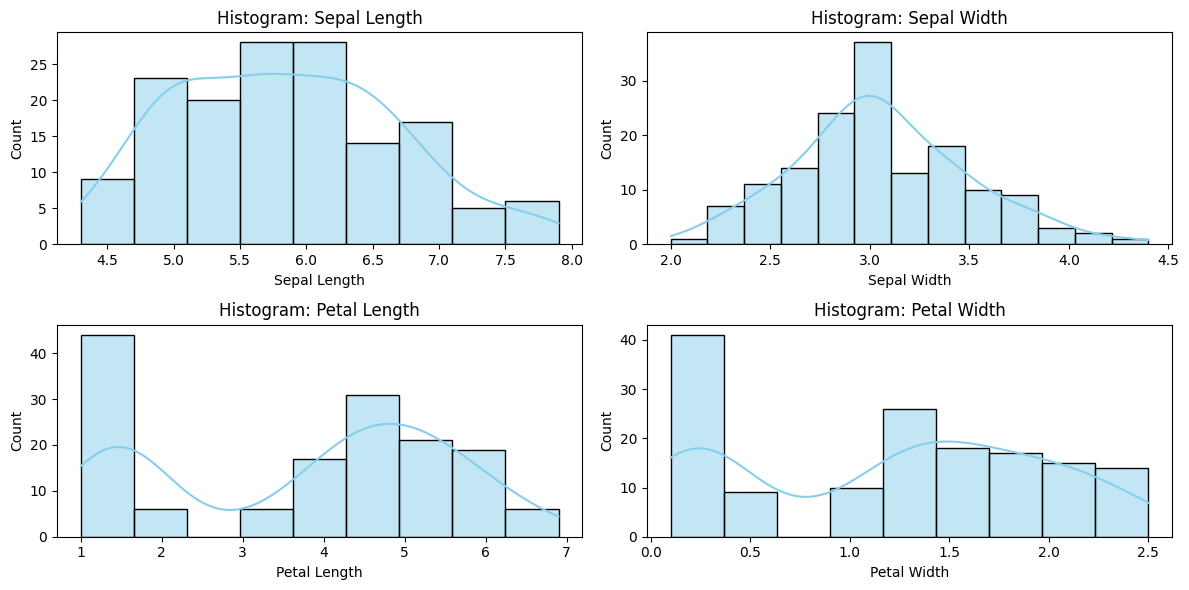

In [172]:
# Histogram untuk distribusi nilai fitur
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Histogram: {feature}')

plt.tight_layout()
plt.show()

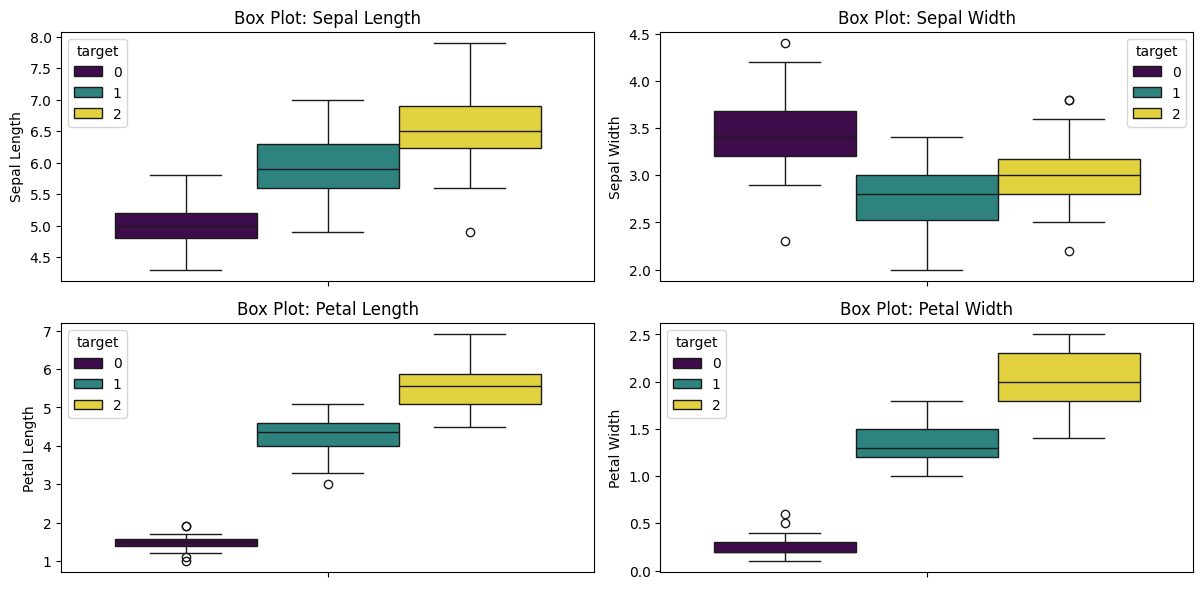

In [173]:
# Box Plot untuk melihat distribusi dan outlier
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(hue='target', y=feature, data=df, palette='viridis')
    plt.title(f'Box Plot: {feature}')

plt.tight_layout()
plt.show()

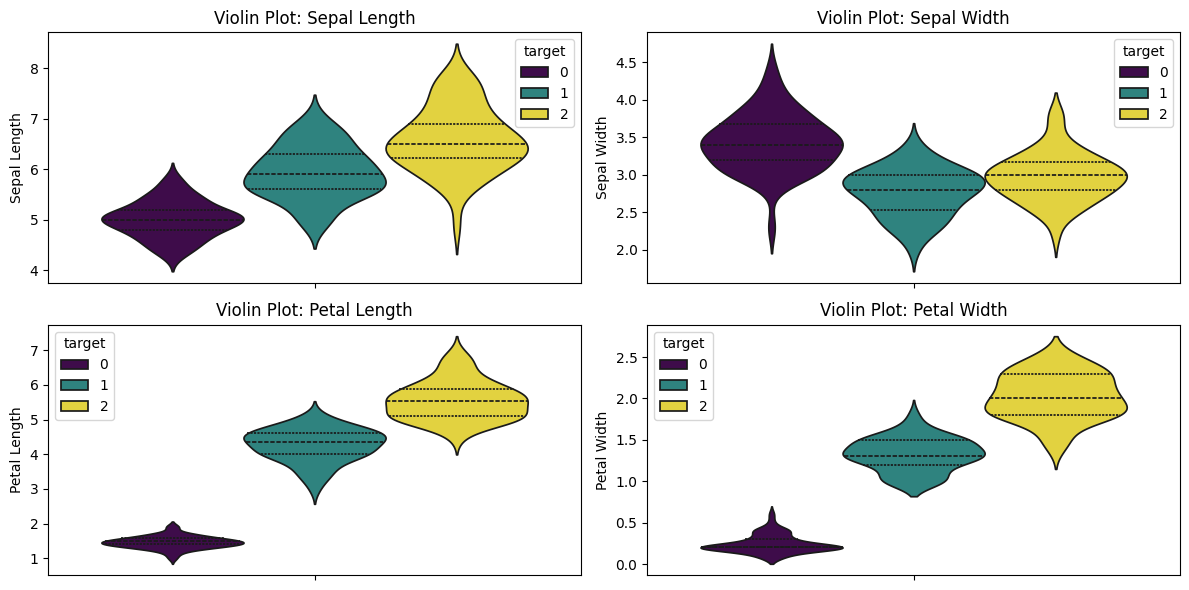

In [174]:
# Violin Plot untuk kombinasi histogram dan kernel density estimate (KDE)
plt.figure(figsize=(12, 6))
for i, feature in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(hue='target', y=feature, data=df, palette='viridis', inner='quartile')
    plt.title(f'Violin Plot: {feature}')

plt.tight_layout()
plt.show()



# RELATIONSHIP

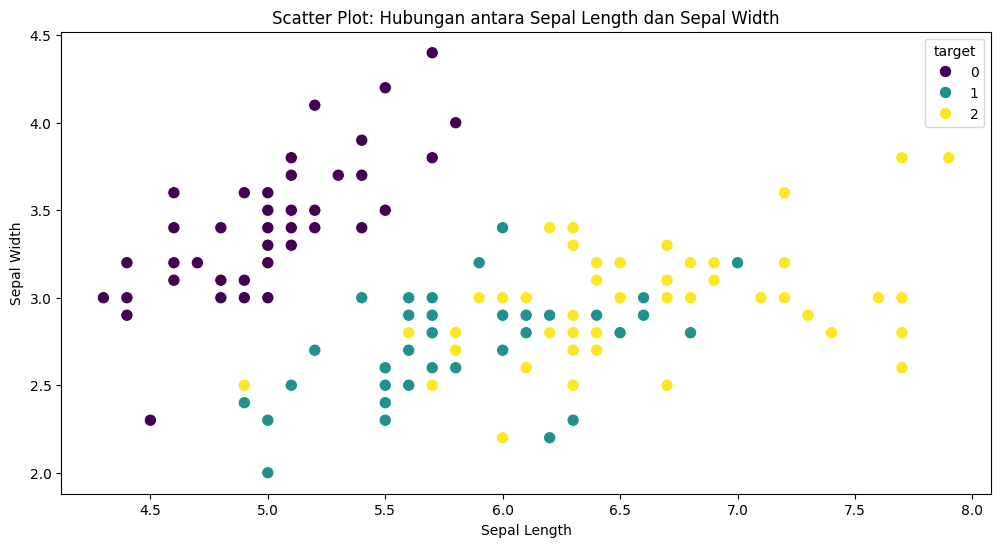

In [175]:
# Scatter Plot untuk melihat hubungan antara dua fitur
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sepal Length', y='Sepal Width', hue='target', data=df, palette='viridis', s=80)
plt.title('Scatter Plot: Hubungan antara Sepal Length dan Sepal Width')
plt.show()

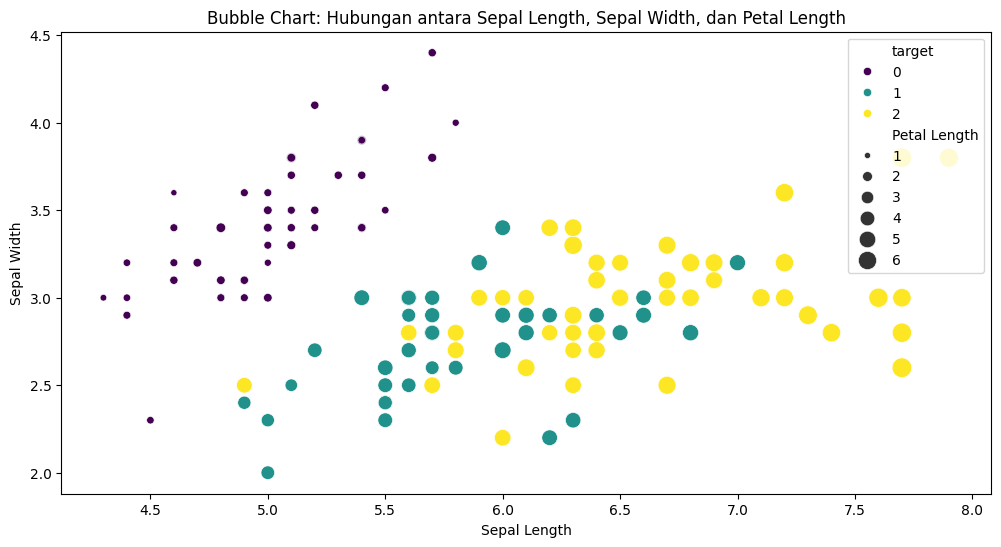

In [176]:
# Bubble Chart untuk menambah dimensi ketiga (ukuran marker) pada scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sepal Length', y='Sepal Width', hue='target', size='Petal Length', sizes=(20, 200), data=df, palette='viridis')
plt.title('Bubble Chart: Hubungan antara Sepal Length, Sepal Width, dan Petal Length')
plt.show()

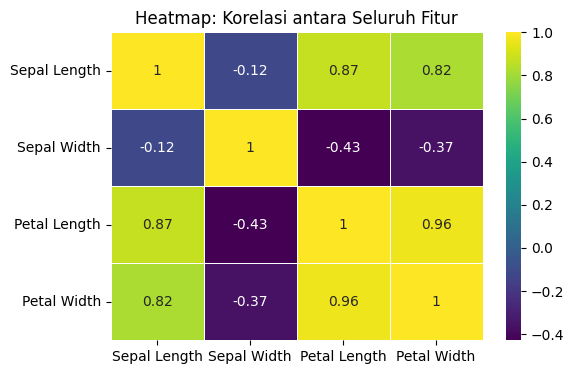

In [177]:
# Heatmap untuk melihat korelasi antara seluruh fitur
correlation_matrix = df.drop('target', axis=1).corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap: Korelasi antara Seluruh Fitur')
plt.show()